In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:

df = pd.read_csv('c:\\Users\\Admin\\Desktop\\Rohit\\MachineLearning\\ml-mlops-workflow\\src\\carbonfootprint\\dataset\\CarbonFootprintData.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


##### 1. Checking Dataset information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              8452 non-null   object 
 1   Model                             8452 non-null   object 
 2   Vehicle Class                     8452 non-null   object 
 3   Engine Size(L)                    8452 non-null   float64
 4   Cylinders                         8452 non-null   int64  
 5   Transmission                      8452 non-null   object 
 6   Fuel Type                         8452 non-null   object 
 7   Fuel Consumption City (L/100 km)  8452 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   8452 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  8452 non-null   float64
 10  Fuel Consumption Comb (mpg)       8452 non-null   int64  
 11  CO2 Emissions(g/km)               8452 non-null   int64  
dtypes: flo

In [4]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

##### 2. Checking categorial variables in the dataset

In [5]:
features = []
for column in df.columns:
    is_categorical = df[column].dtype == 'O'
    if is_categorical:
        print("The feature {} is categorical variable".format(column))
        features.append(column)
print(features)

The feature Make is categorical variable
The feature Model is categorical variable
The feature Vehicle Class is categorical variable
The feature Transmission is categorical variable
The feature Fuel Type is categorical variable
['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']


##### 3. Checking unique data in categorical features

In [6]:
categorical_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
for data in categorical_features:
    print(data + ':-')
    print(df[data].unique())
    print('-------------------------------------------------------------------------')

Make:-
['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
-------------------------------------------------------------------------
Model:-
['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'JETTA TDI CLEAN DIESEL'
 'PASSAT TDI CLEAN DIESEL' 'TOUAREG TDI CLEAN DIESEL']
-------------------------------------------------------------------------
Vehicle Class:-
['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
----------------------

##### 4. Checking statistics of numerical features

In [7]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000,8452.000000
mean,3.183578,5.637719,12.649953,9.096356,11.051550,27.350331,251.297208
std,1.363435,1.825311,3.589864,2.308503,2.980477,7.269966,59.173953
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.800000,6.000000,14.700000,10.300000,12.700000,32.000000,290.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


##### 5. Checking null values in the dataset

In [8]:
(df.isnull().sum() / df.isnull().count() * 100)[df.isnull().sum() > 0]

Series([], dtype: float64)

##### 6. Checking pair plot for multi-variate analysis

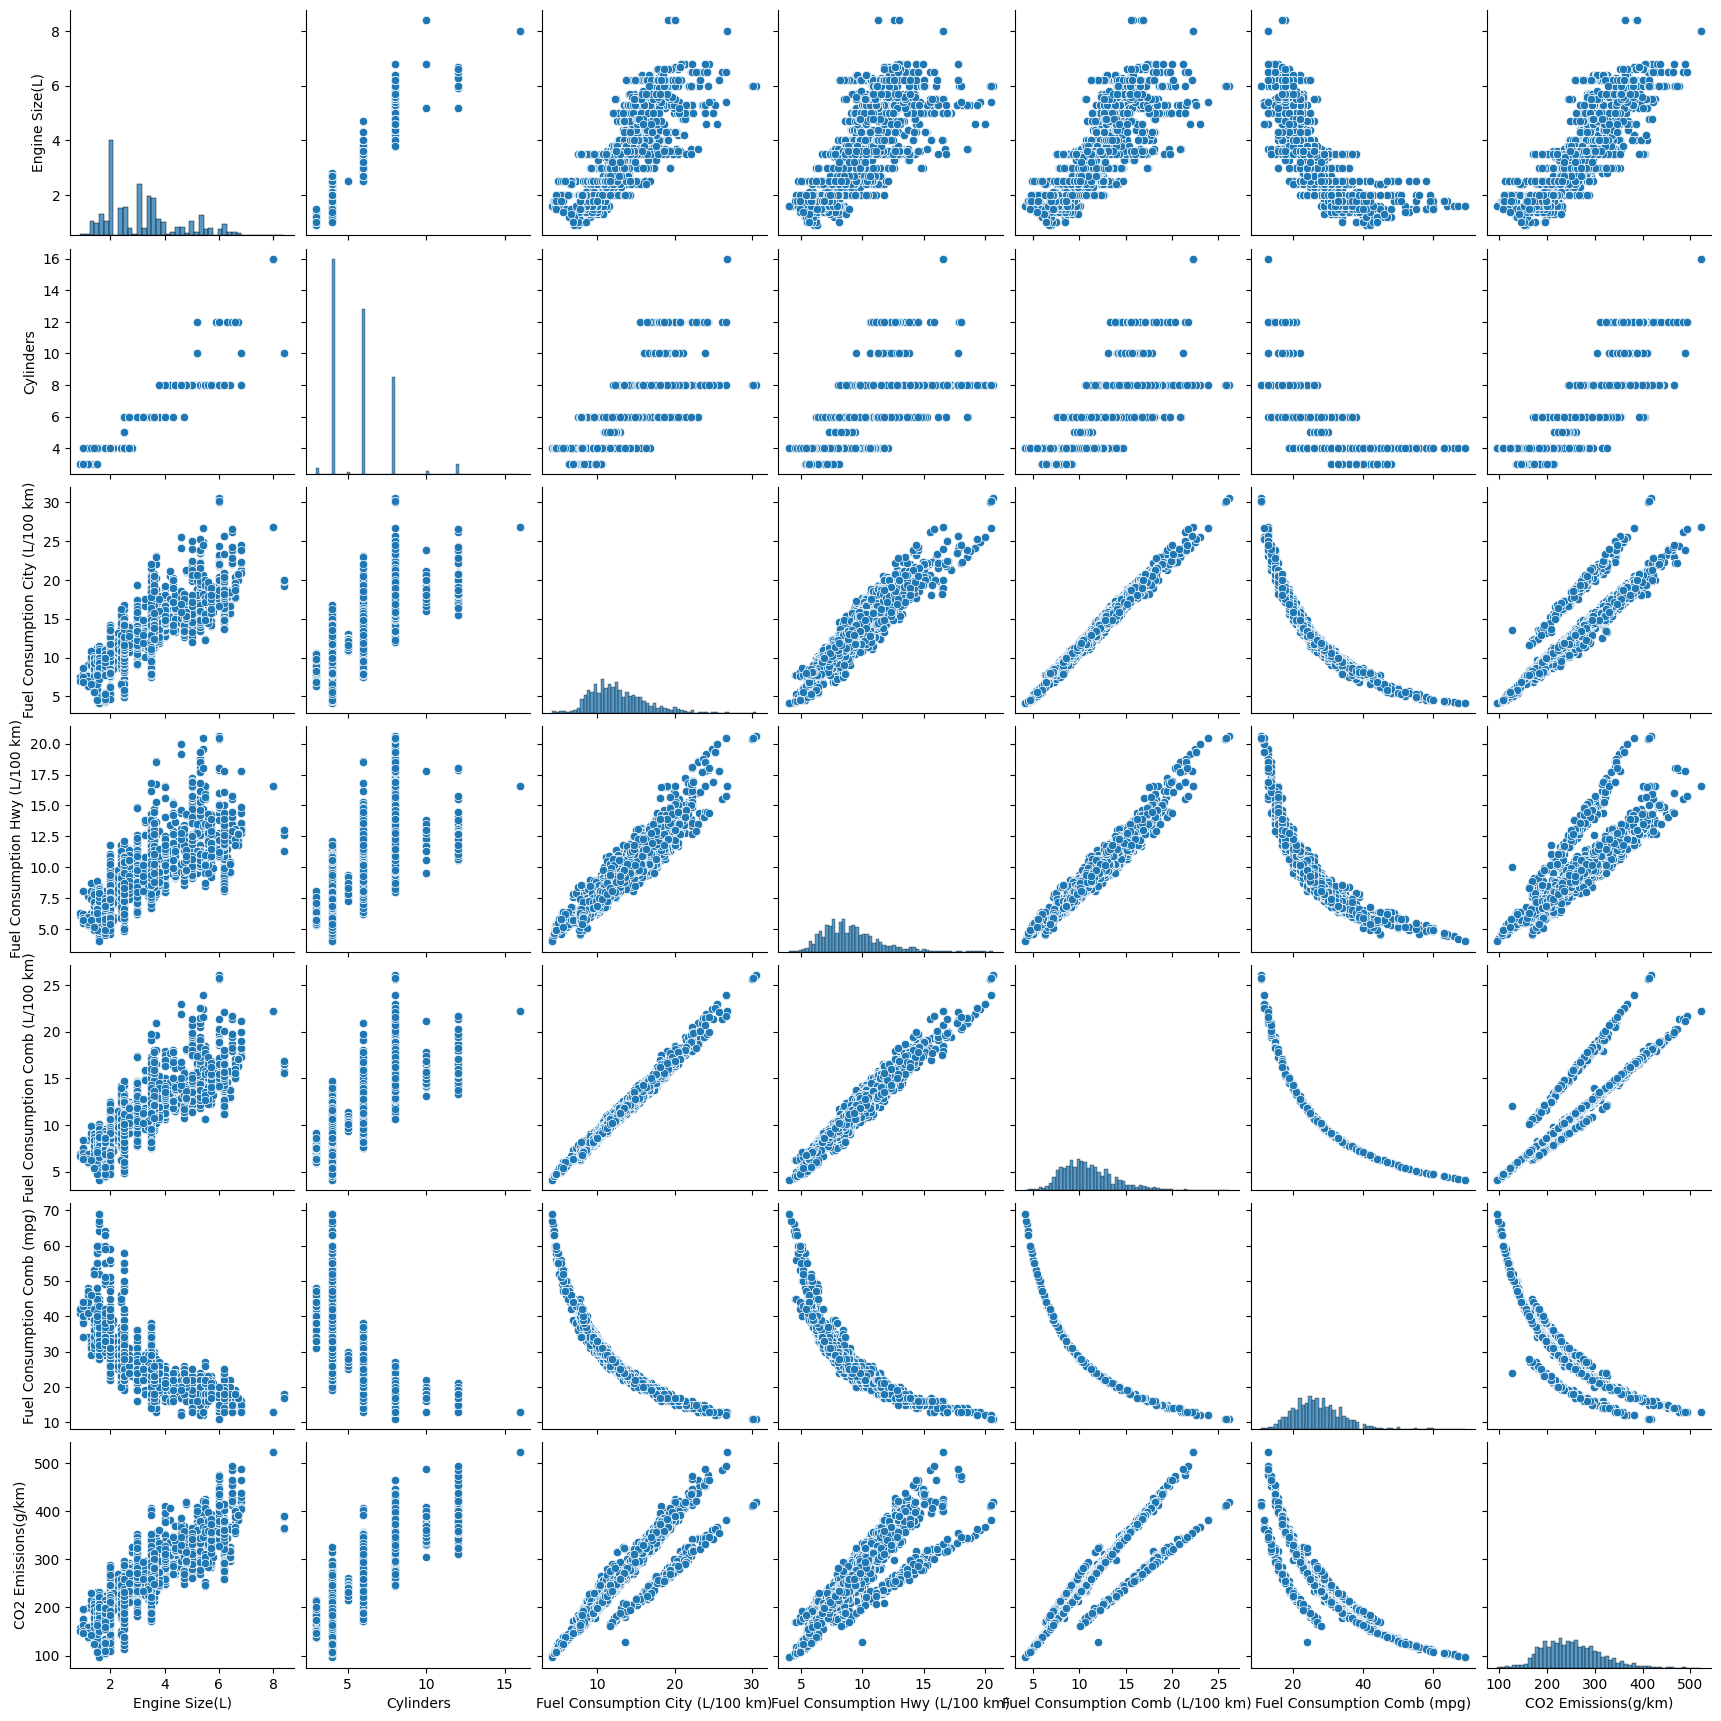

In [9]:
sns.pairplot(df)

##### 7. Creating new dataframe with only numerical features

In [10]:
df_numerical = df.drop(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], axis=1, inplace=True)